# Storytelling of the White Wine Dataset
---
The white wine dataset is structured by columns of different physicochemical attributes and quality score. Each attributes are gathered based on common physicochemical tests for wine. The quality column is a sensory score based on preference. Each wine sample is evaluated by a minumum three sensory tester and the final score is taken by the median of the evaluations.

Before exploring the dataset, there are some preliminary questions that we can ask:

1. What does the distribution of wine quality look like?

2. Are there direct correlation between each attributes with the quality score?

3. Are there any correlations between different attributes?

---



In [17]:
#import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#load the white wine quality dataset.
filename = 'winequality-white.csv' 
df = pd.read_csv(filename, sep=';')

#print the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


The dataset information shows that there are 4898 white wine samples and 12 columns that include physiochemical attributes and quality score. Since the qualiy scores are discrete, a bar graph can also show the distribute of the quality scores instead of a histogram.

In [35]:
#generates counts of wine samples by each quality score, and a chart is generated by using Tableau.
count = df.quality.value_counts().sort_index()
count

3      18
4     163
5    1457
6    2193
7     880
8     175
9       5
Name: quality, dtype: int64

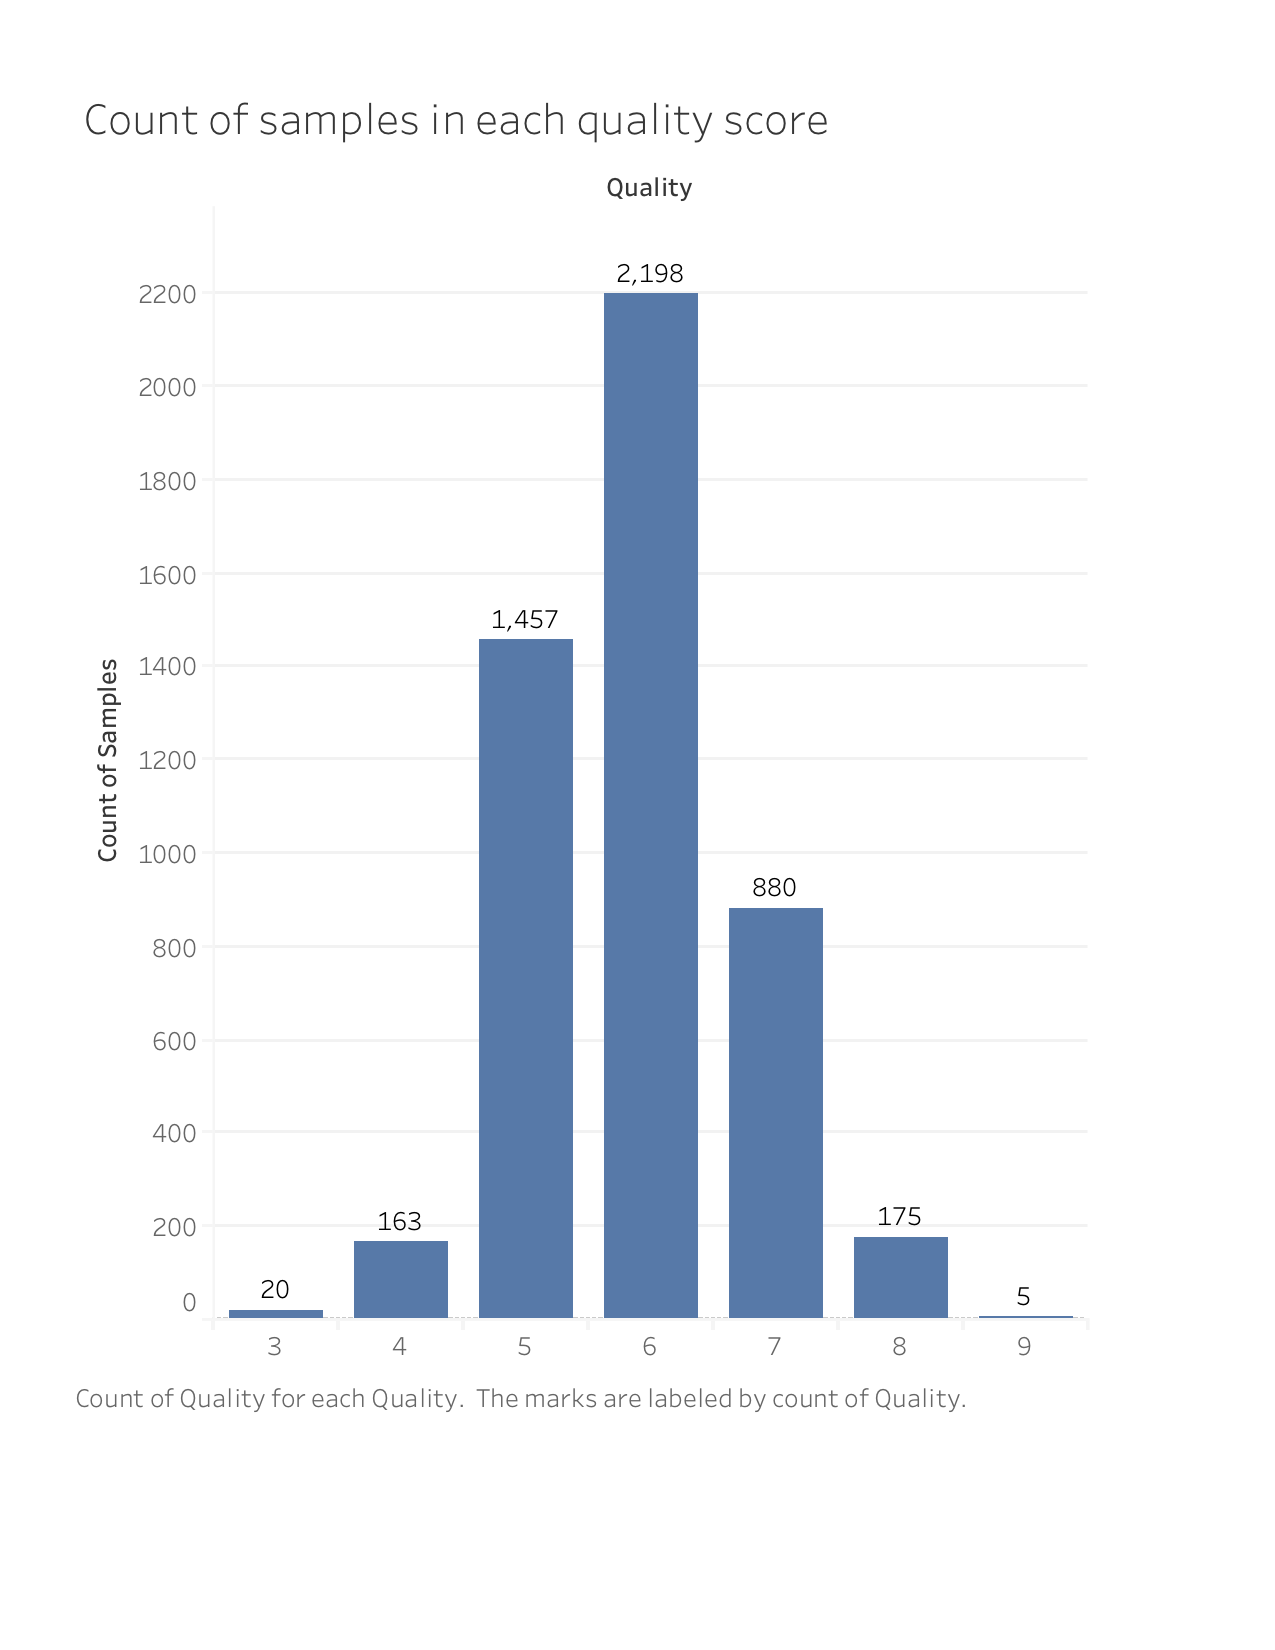

The bar chart shows that the wines samples in the dataset have mostly normals scores with very few good and bad ones.

---
Next, we can look for direct correlation between each attributes with the quality score by using scatter plots.

In [19]:
from pandas.plotting import scatter_matrix

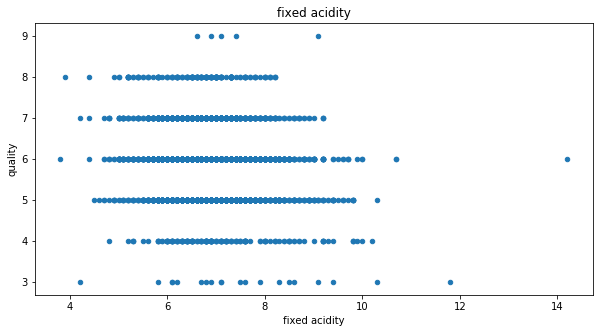

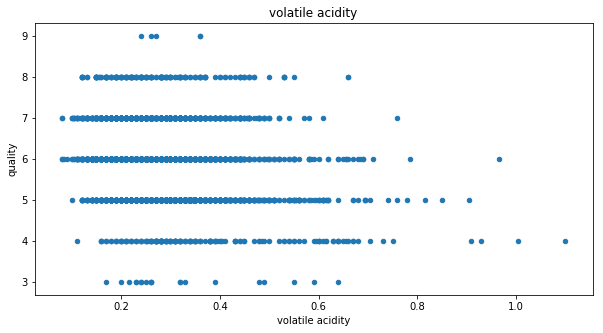

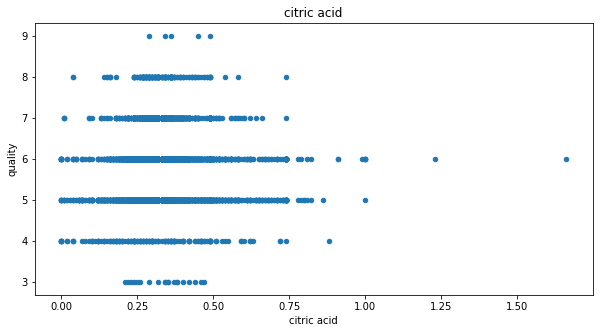

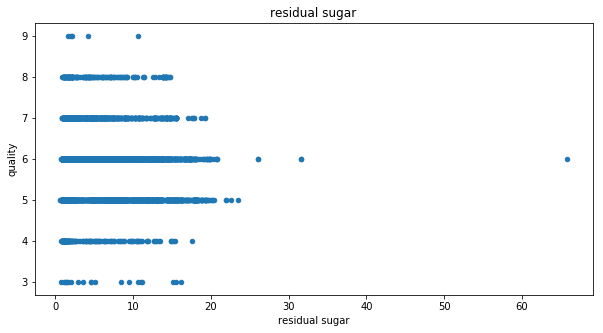

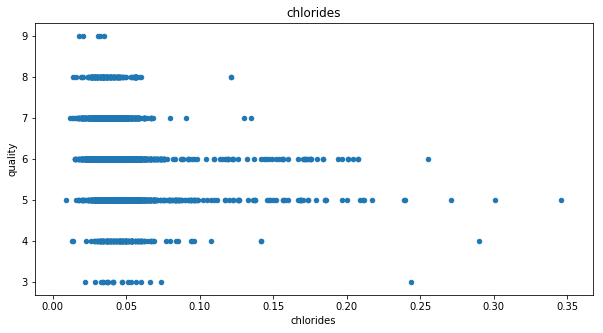

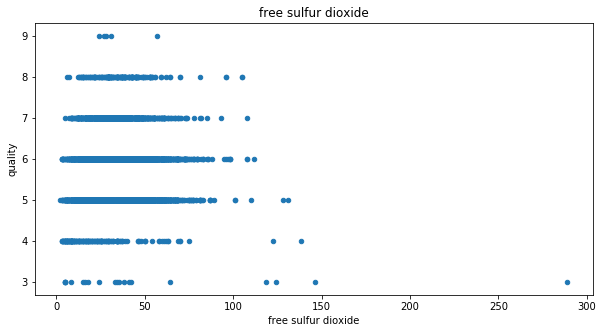

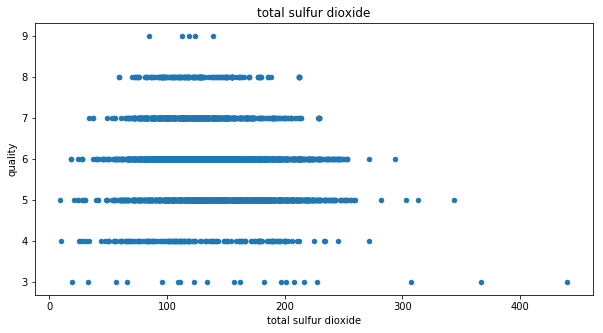

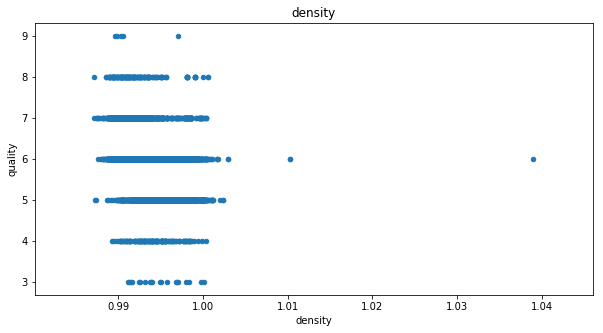

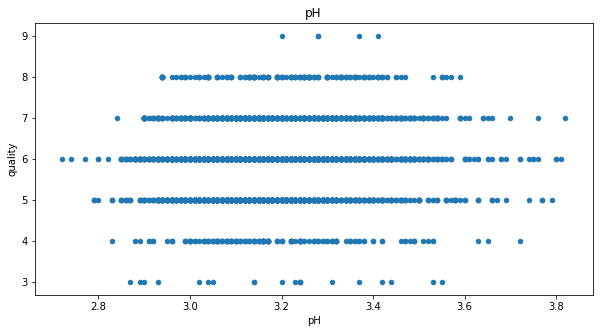

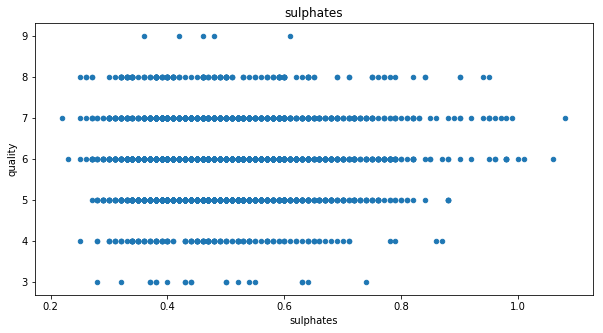

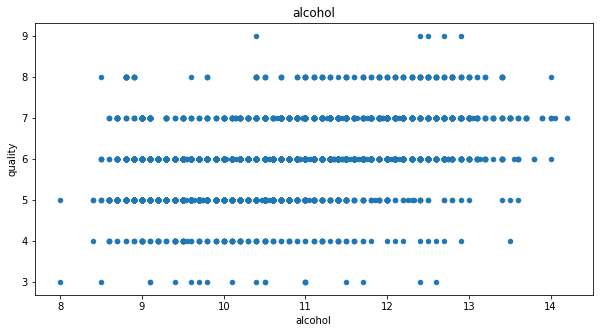

In [48]:
df.plot.scatter(y='quality', x='fixed acidity',title='fixed acidity',figsize=(10,5))
df.plot.scatter(y='quality',x='volatile acidity',title='volatile acidity',figsize=(10,5))
df.plot.scatter(y='quality',x='citric acid',title='citric acid',figsize=(10,5))
df.plot.scatter(y='quality',x='residual sugar',title='residual sugar',figsize=(10,5))
df.plot.scatter(y='quality',x='chlorides',title='chlorides',figsize=(10,5))
df.plot.scatter(y='quality',x='free sulfur dioxide',title='free sulfur dioxide',figsize=(10,5))
df.plot.scatter(y='quality',x='total sulfur dioxide',title='total sulfur dioxide',figsize=(10,5))
df.plot.scatter(y='quality',x='density',title='density',figsize=(10,5))
df.plot.scatter(y='quality',x='pH',title='pH',figsize=(10,5))
df.plot.scatter(y='quality',x='sulphates',title='sulphates',figsize=(10,5))
df.plot.scatter(y='quality',x='alcohol',title='alcohol',figsize=(10,5))

The scatter plots yields some interesting observations:

1. Lower quality wine samples tend to have higher volatile acidity.

2. Wine samples with higher residual sugar have higher tendency to be scored between 5 and 7.

3. There is a positive correlation between alcohol content and quality score.

---

Next, we can look for correlations between each individual attributes by creating a scatter matrix.

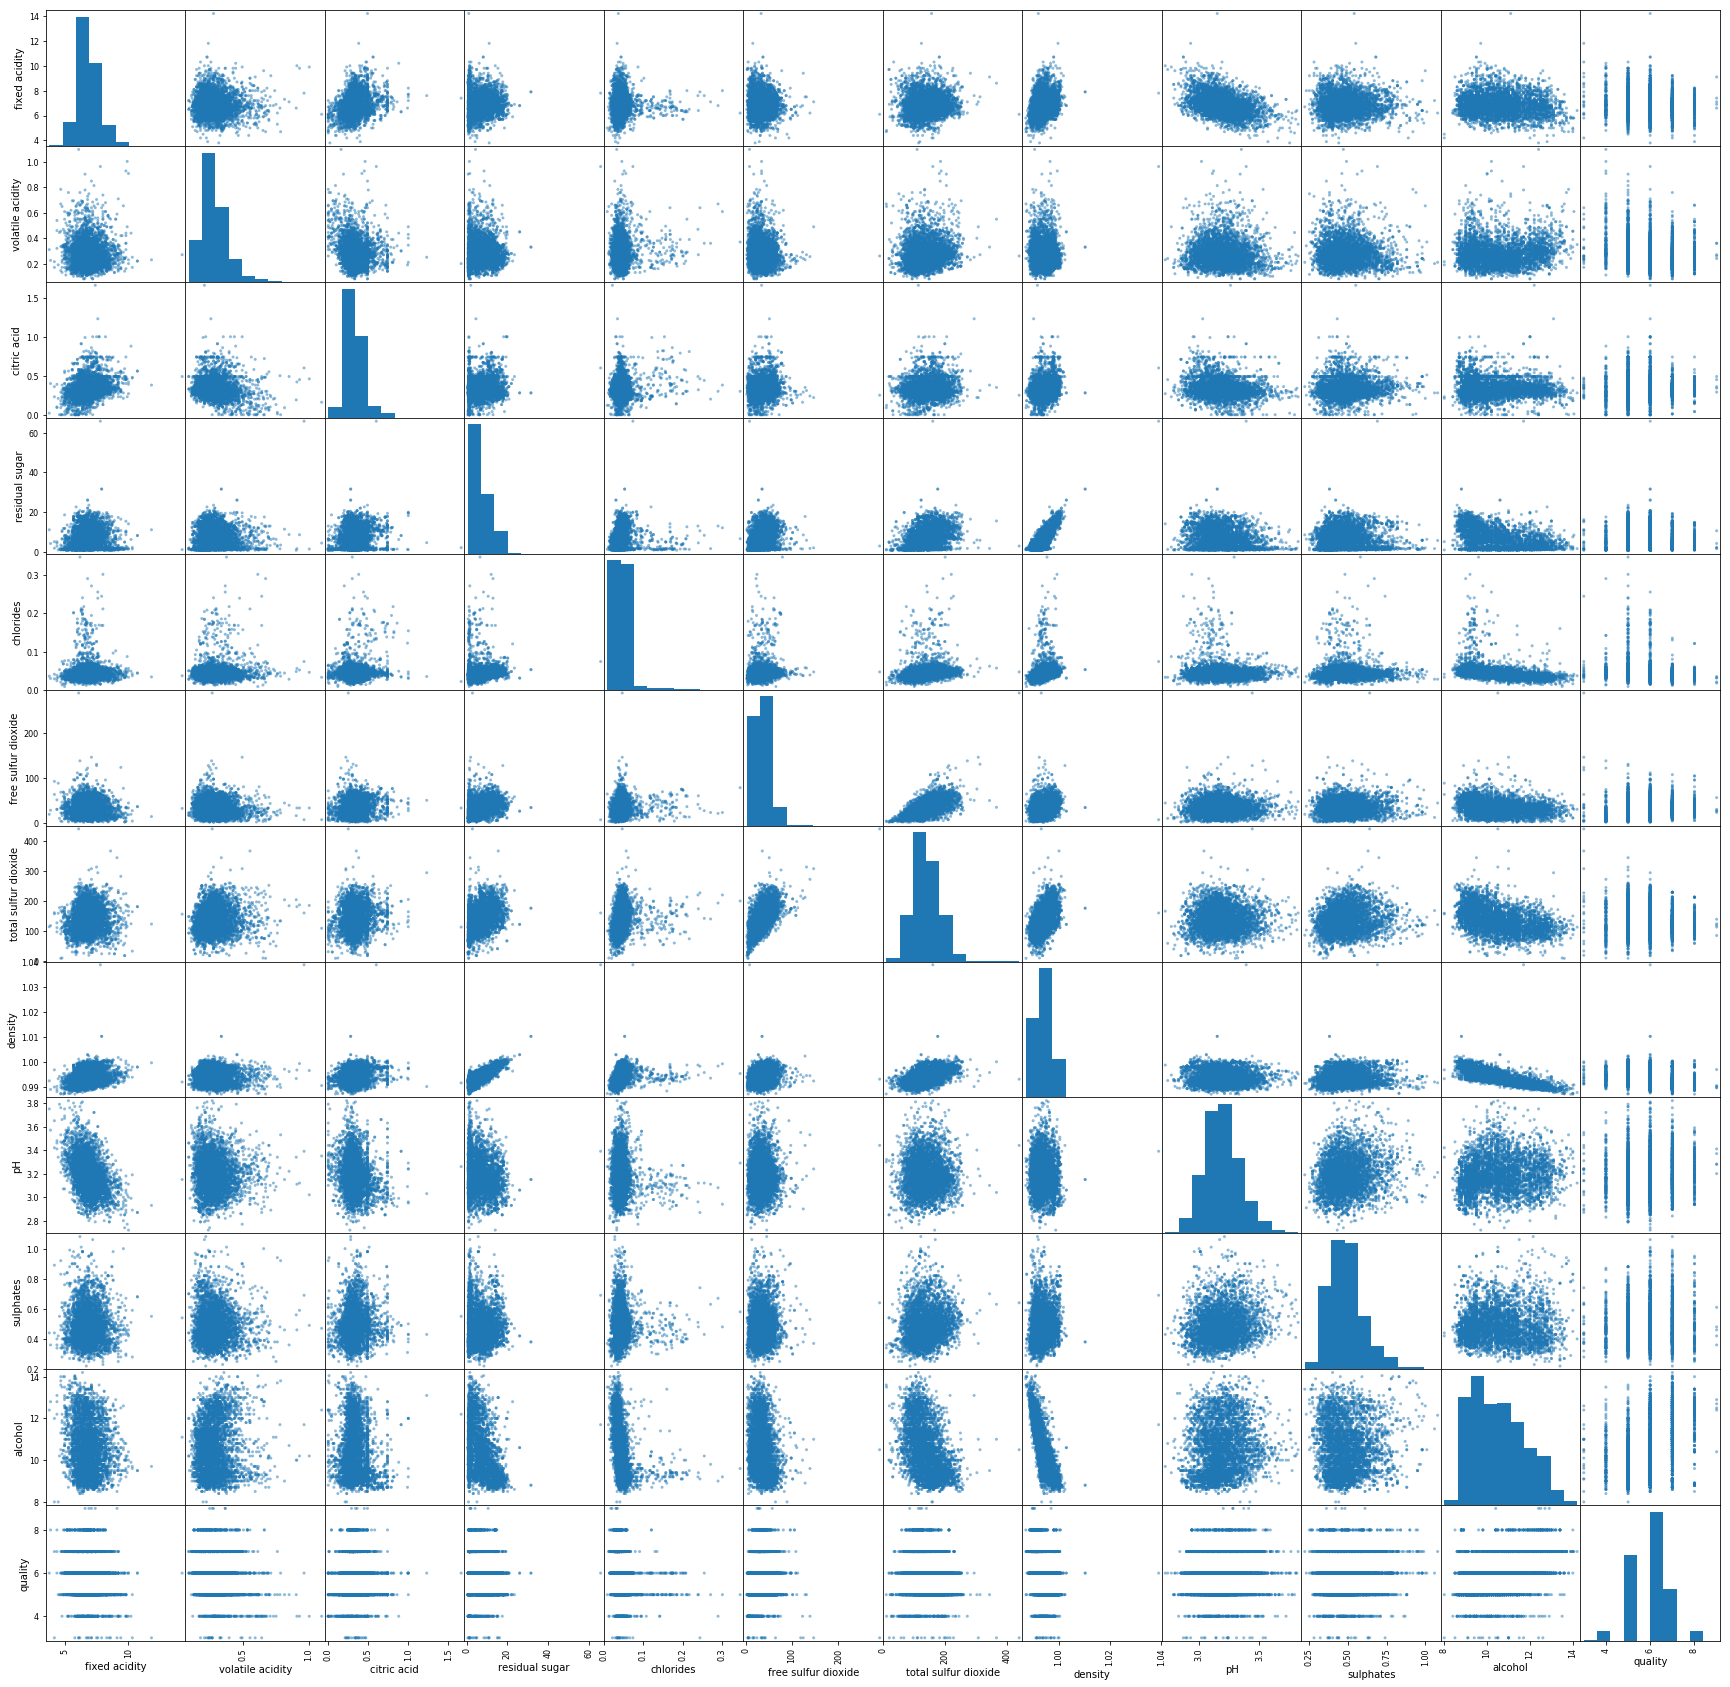

In [41]:
%matplotlib inline
smatrix = scatter_matrix(df, figsize=(30,30))

Some of the scatter plots above are clumped together due to the presence of outliers. The situation is most visible in the fixed acidity, citric acid, residual sugar, free sulfur dioxide, and density columns. Next, we can remove those outliers by filtering with .loc and remove with drop method.

In [29]:
df.loc[df['fixed acidity']>11]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1526           14.2              0.27         0.49             1.1      0.037   
2050           11.8              0.23         0.38            11.1      0.034   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1526                 33.0                 156.0   0.9920  3.15       0.54   
2050                 15.0                 123.0   0.9997  2.93       0.55   

      alcohol  quality  
1526     11.1        6  
2050      9.7        3

In [30]:
df.loc[df['citric acid']>1.5]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
745            7.4               0.2         1.66             2.1      0.022   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
745                 34.0                 113.0  0.99165  3.26       0.55   

     alcohol  quality  
745     12.2        6

In [31]:
df.loc[df['residual sugar']>60]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2781            7.8             0.965          0.6            65.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2781                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  quality  
2781     11.7        6

In [32]:
df.loc[df['free sulfur dioxide']>200]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4745            6.1              0.26         0.25             2.9      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4745                289.0                 440.0  0.99314  3.44       0.64   

      alcohol  quality  
4745     10.5        3

In [33]:
df.loc[df['density'] > 1.01]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1653            7.9             0.330         0.28            31.6      0.053   
1663            7.9             0.330         0.28            31.6      0.053   
2781            7.8             0.965         0.60            65.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1653                 35.0                 176.0  1.01030  3.15       0.38   
1663                 35.0                 176.0  1.01030  3.15       0.38   
2781                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  quality  
1653      8.8        6  
1663      8.8        6  
2781     11.7        6

In [49]:
df = df.drop([745,1526,1653,1663,2050,2781,4745])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4891 non-null float64
volatile acidity        4891 non-null float64
citric acid             4891 non-null float64
residual sugar          4891 non-null float64
chlorides               4891 non-null float64
free sulfur dioxide     4891 non-null float64
total sulfur dioxide    4891 non-null float64
density                 4891 non-null float64
pH                      4891 non-null float64
sulphates               4891 non-null float64
alcohol                 4891 non-null float64
quality                 4891 non-null int64
dtypes: float64(11), int64(1)
memory usage: 496.7 KB


After removing the visual outliers, the total number of wine samples are now 4891.

Another scatter matrix without the outliers will show more nuanced relationships between each indivisual attributes.

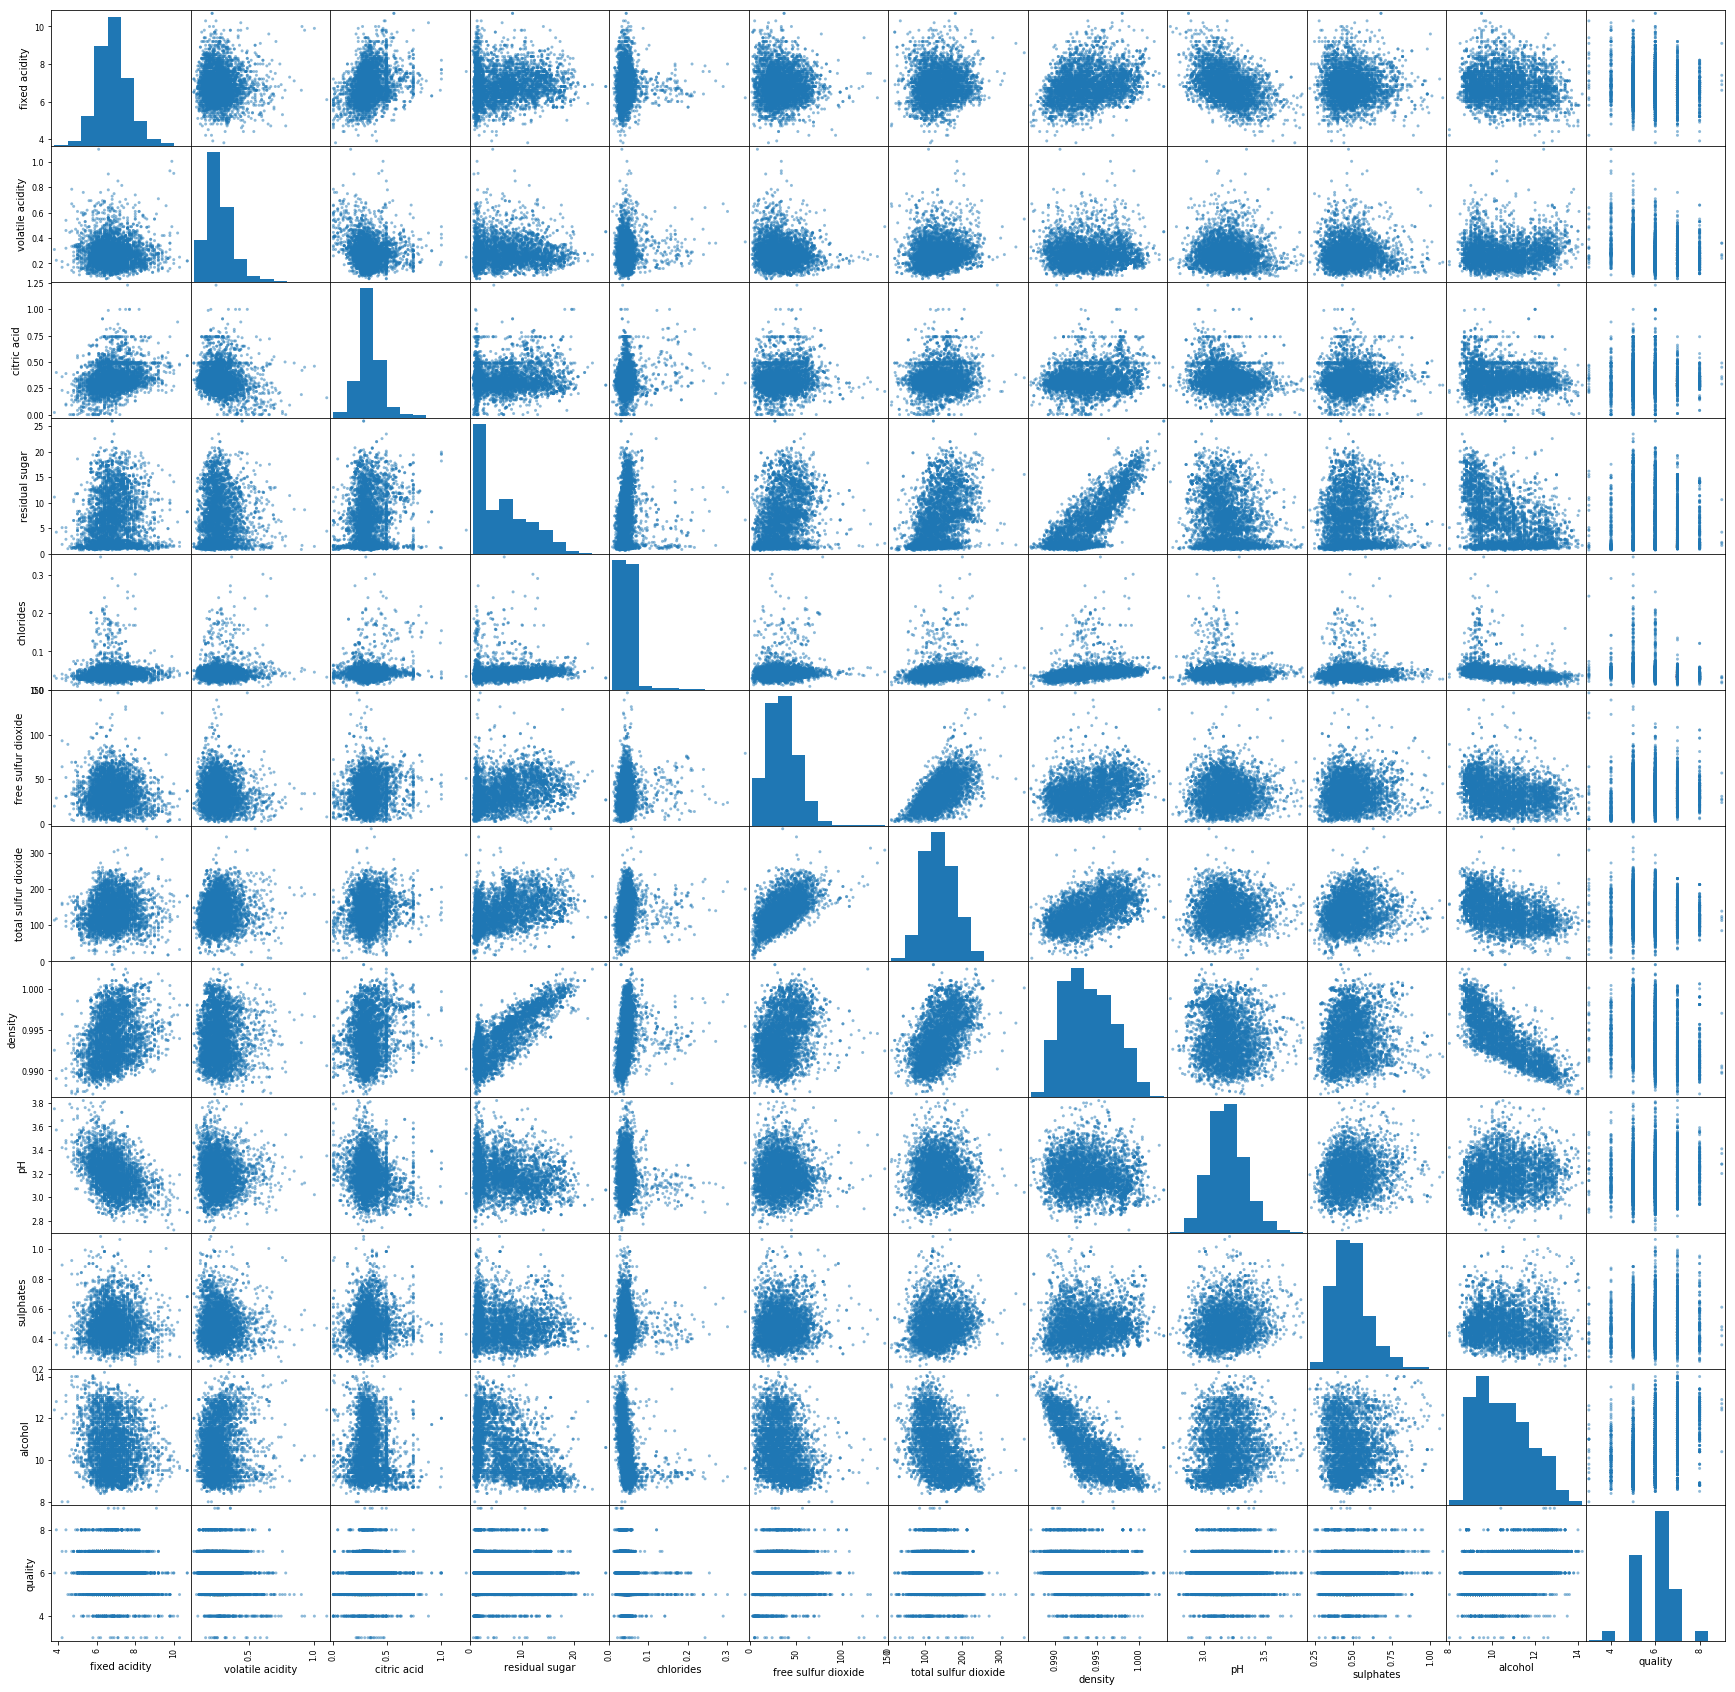

In [22]:
%matplotlib inline
smatrix = scatter_matrix(df, figsize=(30,30))

Many correlations can be observed from the scatter matrix above. Here is a list of the observations:

1. There is a strong positive correlation between residual sugar and density.
2. Free sulfur dioxide and total sulfur dioxide are positively correlated.
3. Total sulfur dioxide and density are positively correlated.
4. There is a negative correlation between density and alcohol.
5. Negative correlation between pH and fixed acidity.
6. Chlorides is also positively correlated to residual sugar and density.
7. Since there is a negative correlation between density and alcohol, chlorides and alcohol are also negatively correlated.
8. Wine samples with higher alcohol content is more likely to have less residual sugar.

## Summary
---

The dataset consists mostly samples that are scored average on the preference scale with only fraction that are either very good or very bad. From the relationship between each individual physiochemical attributes to quality, we three interesting findings:

1. Lower quality wine samples tend to have higher volatile acidity. Volatile acidity in wine is mainly acetic acid, which is vinegar fermented from the alcohol. When the amount of acetic acid in wine passes the sensory threshold, it can introduce off taste. 

2. Wine samples with higher residual sugar have higher tendency to be scored between 5 and 7. This obversation can yield two hypotheses. First, wines with some residual sugar may help masking some off taste and balance the taste of wine. Second, the quality assesors tend to prefer wines to be less sweet that are already balanced.

3. There is a positive correlation between alcohol content and quality score. 

Besides the correlation between attributes and quality score, many of the attributes are also correlated to each other. One of the most significant correlation is between residual sugar and density.